In [27]:
import pandas as pd
from scipy.stats import norm
import numpy as np
import requests
import yfinance as yf
import datetime 
import warnings
warnings.filterwarnings("ignore")

In [6]:
Tesla = yf.download("TSLA", start="2019-01-01", end="2021-04-01",group_by="ticker") 
print(Tesla)

[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2018-12-31   67.557999   67.842003   65.052002   66.559998   66.559998   
2019-01-02   61.220001   63.026001   59.759998   62.023998   62.023998   
2019-01-03   61.400002   61.880001   59.476002   60.071999   60.071999   
2019-01-04   61.200001   63.599998   60.546001   63.537998   63.537998   
2019-01-07   64.344002   67.348000   63.549999   66.991997   66.991997   
...                ...         ...         ...         ...         ...   
2021-03-25  613.000000  645.500000  609.500000  640.390015  640.390015   
2021-03-26  641.869995  643.820007  599.890015  618.710022  618.710022   
2021-03-29  615.640015  616.479980  596.020020  611.289978  611.289978   
2021-03-30  601.750000  637.659973  591.010010  635.619995  635.619995   
2021-03-31  646.619995  672.000000  641.109

In [9]:
Tesla['price1']=Tesla['Close'].shift(-1)

In [10]:
Tesla['priceDiff']=Tesla['price1']-Tesla['Close']

In [11]:
Tesla['return']=Tesla['priceDiff']/Tesla['Close']

In [12]:
Tesla['direction']=[1 if Tesla.loc[ei,'priceDiff']>0 else -1 for ei in Tesla.index]

In [19]:
%matplotlib inline

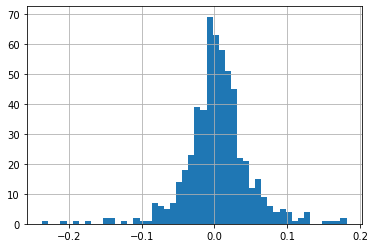

In [20]:
Tesla['LogReturn'] = np.log(Tesla['Close']).shift(-1) - np.log(Tesla['Close'])
Tesla['LogReturn'].hist(bins=50)

In [60]:
#MovingAverage
Tesla['Avg3']=(Tesla['Close']+Tesla['Close'].shift(1)+Tesla['Close'].shift(2))/3
#calculate moving average using rolling 
Tesla['MA40']=Tesla['Close'].rolling(40).mean()
Tesla['MA200']=Tesla['Close'].rolling(200).mean()

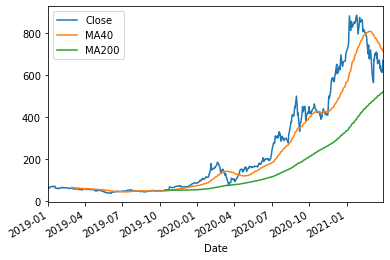

In [61]:
Tesla['Close'].plot(legend=True)
Tesla['MA40'].plot(legend=True)
Tesla['MA200'].plot(legend=True)
##
#If MA40 is above MA200, some traders who we call trend-following traders,
#they believe the stock price will move upwards for a while.

-------------------------------

In [64]:
mu = Tesla['LogReturn'].mean()
sigma = Tesla['LogReturn'].std(ddof=1)
print(mu, sigma)

0.004074345595102235 0.0457006142533409


In [40]:
mu220 = 220*mu
sigma220 = 220**0.5*sigma
print(mu220, sigma220)

print('The probability of rise over 10% in 220 day is')
print(norm.cdf(0.1, mu220, sigma220))
print('The probability of droppong over 10% in 220 day is')
print(norm.cdf(-0.1, mu220, sigma220))
print('The probability of droppong over 20% in 220 day is')
print(norm.cdf(-0.2, mu220, sigma220))
print('The probability of droppong over 30% in 220 day is')
print(norm.cdf(-0.3, mu220, sigma220))
print('The probability of droppong over 40% in 220 day is')
print(norm.cdf(-0.4, mu220, sigma220))
print('The probability of droppong over 50% in 220 day is')
print(norm.cdf(-0.5, mu220, sigma220))
print('The probability of droppong over 60% in 220 day is')
print(norm.cdf(-0.6, mu220, sigma220))
print('The probability of droppong over 70% in 220 day is')
print(norm.cdf(-0.7, mu220, sigma220))
print('The probability of droppong over 80% in 220 day is')
print(norm.cdf(-0.8, mu220, sigma220))
print('The probability of droppong over 90% in 220 day is')
print(norm.cdf(-0.9, mu220, sigma220))
print('The probability of droppong over 100% in 220 day is')
print(norm.cdf(-1, mu220, sigma220))

0.8963560309224917 0.6778496525699385
The probability of rise over 100% in 220 day is
0.12003198053302616
The probability of droppong over 10% in 220 day is
0.07079745156717171
The probability of droppong over 20% in 220 day is
0.05289566418065991
The probability of droppong over 30% in 220 day is
0.038787908873093066
The probability of droppong over 40% in 220 day is
0.027909017189078324
The probability of droppong over 50% in 220 day is
0.01970027552880955
The probability of droppong over 60% in 220 day is
0.01363942304082256
The probability of droppong over 70% in 220 day is
0.009260613865166882
The probability of droppong over 80% in 220 day is
0.006165023457469411
The probability of droppong over 90% in 220 day is
0.00402363173496019
The probability of droppong over 100% in 220 day is
0.00257414619263484


In [43]:
z_left = norm.ppf(0.1)
z_right = norm.ppf(0.9)
sample_mean = Tesla['LogReturn'].mean()
sample_std = Tesla['LogReturn'].std(ddof=1)/(Tesla.shape[0])**0.5

In [44]:
interval_left = sample_mean + z_left * sample_std
interval_right = sample_mean + z_right * sample_std
print("Sample Mean is", sample_mean)
print("----------------------------------------------------------------------")
print("80 confidence interval is")
print(interval_left, interval_right)

Sample Mean is 0.004074345595102235
----------------------------------------------------------------------
80 confidence interval is
0.0024590679156651354 0.005689623274539334


In [53]:
alpha = 0.05
zleft = norm.ppf(alpha/2, 0, 1)
zright = -zleft
n = 567
zhat = (sample_mean-0)/(sample_std/n**0.5)
print(zhat)
print(zleft, zright)
print('At the significance level if：', alpha)
print('Shall we reject?：', zhat > zright or zhat <zright)

50.549735275255856
-1.9599639845400545 1.9599639845400545
At the significance level if： 0.05
Shall we reject?： True
